In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['DIS', 'AMZN']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'google', start = '2010-1-1')['Close']

In [4]:
pf_data.tail()

,DIS,AMZN
Date,,
2017-06-07,105.92,1010.07
2017-06-08,104.32,1010.27
2017-06-09,105.62,978.31
2017-06-12,107.04,964.91
2017-06-13,106.56,980.79


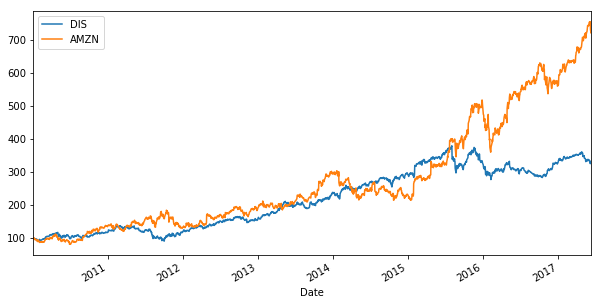

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

DIS     0.160276
AMZN    0.270350
dtype: float64

In [8]:
log_returns.cov() * 250

,DIS,AMZN
DIS,0.044319,0.026576
AMZN,0.026576,0.098662


In [9]:
log_returns.corr()

,DIS,AMZN
DIS,1.00000,0.40194
AMZN,0.40194,1.00000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([ 0.657949  ,  0.02493832])

In [16]:
arr[0] + arr[1]

0.68288732748492997

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.18775904,  0.81224096])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.2496822910761077

Expected Portfolio Variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.074759086518318432

Expected Portfolio Volatility:

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.27342107914043212

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.27034249574828256,
  0.24895746069785,
  0.1965570613973436,
  0.23823868911996382,
  0.16506489287675777,
  0.2227891142993922,
  0.20666674544711897,
  0.22284892850288135,
  0.17181540891382455,
  0.21069612902102175,
  0.20953112371641838,
  0.21174102317113935,
  0.2418220467261113,
  0.17997393798025055,
  0.227479323628796,
  0.2258320418216779,
  0.21375446452966113,
  0.22596909241537189,
  0.25184583512779457,
  0.22382177399767406,
  0.23739740141155732,
  0.1890766798428484,
  0.2543238868260044,
  0.19003833867891326,
  0.18892654140035975,
  0.24041375630160086,
  0.17078939443661198,
  0.19739449649501445,
  0.2662853926672037,
  0.18489774058651817,
  0.2692213857646219,
  0.21854588661650529,
  0.21415021785992475,
  0.2143326682190378,
  0.25790720619968877,
  0.2198569739381317,
  0.21936601924457239,
  0.17404902063032845,
  0.20933161697946973,
  0.23125119319645854,
  0.17856841243924224,
  0.21634688609921107,
  0.2585057995003372,
  0.2579273200929932,
  0.2

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.1759497 ,  0.26915748,  0.21189398,  0.251817  ,  0.26089739,
         0.23046142,  0.18030673,  0.24677939,  0.19141677,  0.22813147,
         0.24333597,  0.19469761,  0.17935208,  0.242225  ,  0.17781714,
         0.1681366 ,  0.18527222,  0.22026204,  0.18517451,  0.21948707,
         0.24007255,  0.25185373,  0.23927036,  0.21219547,  0.20066445,
         0.22004999,  0.24187229,  0.23242982,  0.23005597,  0.18094046,
         0.22016435,  0.21880691,  0.21307307,  0.2271622 ,  0.266862  ,
         0.26188112,  0.19950076,  0.21455154,  0.24143928,  0.22179438,
         0.21746899,  0.17851621,  0.20217181,  0.20437928,  0.22018486,
         0.22062621,  0.19568612,  0.22848343,  0.17207897,  0.19789971,
         0.16123302,  0.26686542,  0.22170618,  0.16817491,  0.25318569,
         0.22965706,  0.19397104,  0.19086094,  0.26763482,  0.18470176,
         0.23710797,  0.18343792,  0.19223581,  0.22241299,  0.18137863,
         0.16198902,  0.1744501 ,  0.24507994,  0.1

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [23]:
portfolios.head()

,Return,Volatility
0,0.175950,0.202700
1,0.269157,0.311626
2,0.211894,0.217789
3,0.251817,0.277371
4,0.260897,0.294862


In [24]:
portfolios.tail()

,Return,Volatility
995,0.176485,0.202587
996,0.227214,0.236556
997,0.203364,0.210221
998,0.258079,0.289320
999,0.190826,0.203445


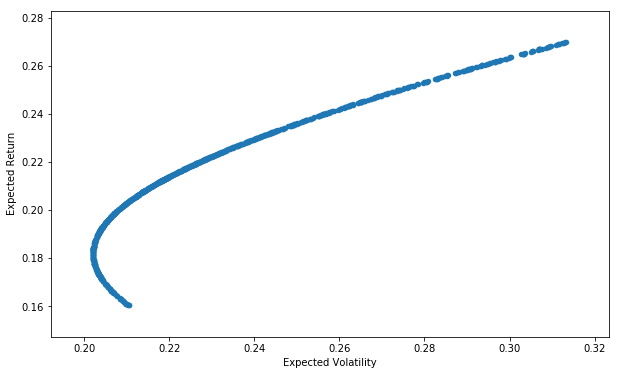

In [25]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')